In [52]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##For total data set

In [53]:
isic_metadata = pandas.read_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/ISIC_2019_Training_Metadata.csv')
print(isic_metadata)

              image  age_approx anatom_site_general    lesion_id     sex
0      ISIC_0000000        55.0      anterior torso          NaN  female
1      ISIC_0000001        30.0      anterior torso          NaN  female
2      ISIC_0000002        60.0     upper extremity          NaN  female
3      ISIC_0000003        30.0     upper extremity          NaN    male
4      ISIC_0000004        80.0     posterior torso          NaN    male
...             ...         ...                 ...          ...     ...
25326  ISIC_0073247        85.0           head/neck  BCN_0003925  female
25327  ISIC_0073248        65.0      anterior torso  BCN_0001819    male
25328  ISIC_0073249        70.0     lower extremity  BCN_0001085    male
25329  ISIC_0073251        55.0         palms/soles  BCN_0002083  female
25330  ISIC_0073254        50.0     upper extremity  BCN_0001079    male

[25331 rows x 5 columns]


In [56]:
ground_truth = pandas.read_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/ISIC_2019_Training_GroundTruth.csv')
print(ground_truth)

              image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0      ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1      ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2      ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3      ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4      ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
...             ...  ...  ...  ...  ...  ...  ...   ...  ...  ...
25326  ISIC_0073247  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0
25327  ISIC_0073248  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0
25328  ISIC_0073249  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25329  ISIC_0073251  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25330  ISIC_0073254  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0

[25331 rows x 10 columns]


(0.0, 2590.0)

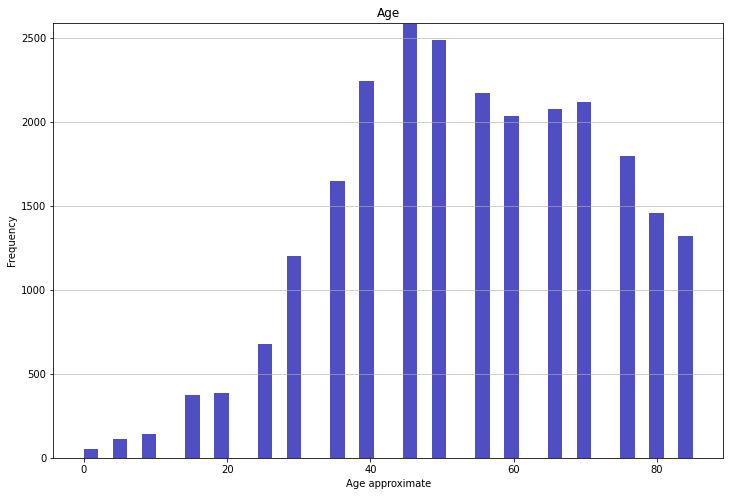

In [ ]:
# Histogram for age
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=isic_metadata["age_approx"], bins='auto', color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age approximate')
plt.ylabel('Frequency')
plt.title('Age')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

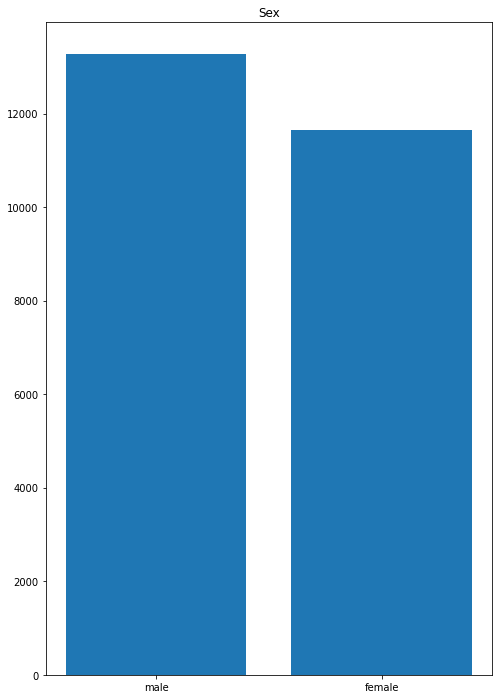

In [ ]:
# Histogram for gender
sex_df = isic_metadata.sex.value_counts()
# sex_df.index

fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(1,1,1)
ax.bar(sex_df.index, sex_df.values)
ax.set_title('Sex')
plt.show()

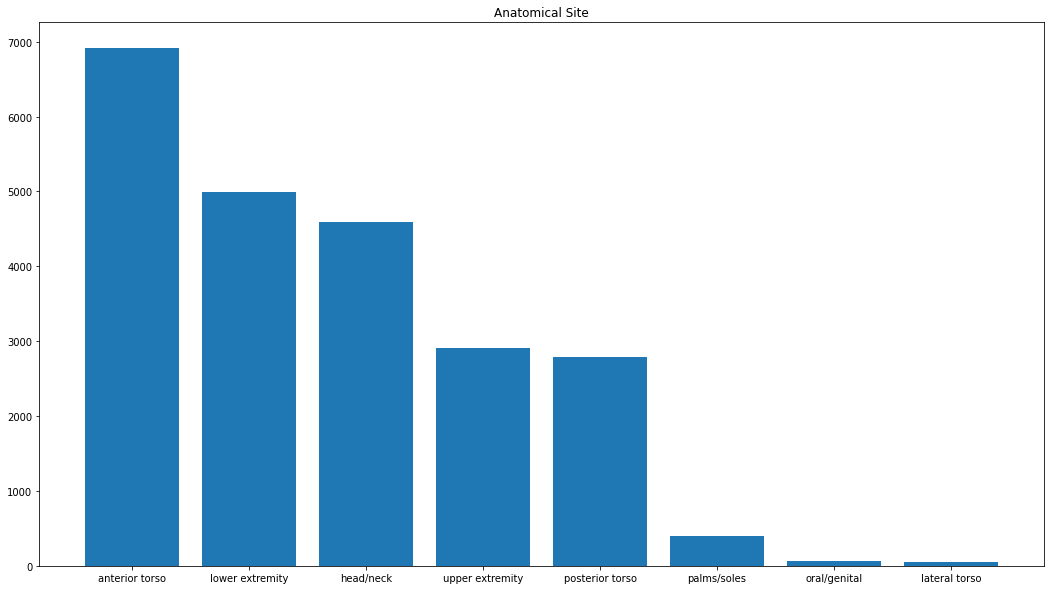

In [ ]:
# histogram for anatom_site_general

site_df = isic_metadata.anatom_site_general.value_counts()

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1,1,1)
ax.bar(site_df.index, site_df.values)
ax.set_title('Anatomical Site')
plt.show()

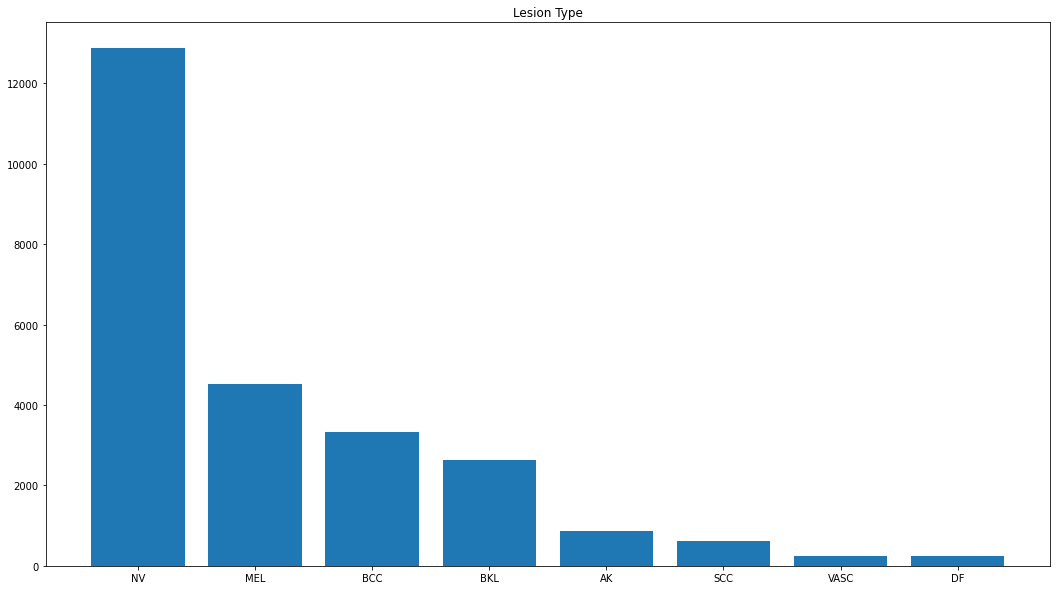

In [57]:
# split of data across lesion type

lesion_type = ("NV", "MEL", "BCC", "BKL", "AK", "SCC", "VASC", "DF")

lesion_freq = (sum(ground_truth["NV"]), sum(ground_truth["MEL"]),
               sum(ground_truth["BCC"]), sum(ground_truth["BKL"]),
               sum(ground_truth["AK"]), sum(ground_truth["SCC"]),
               sum(ground_truth["VASC"]), sum(ground_truth["DF"]))


lesion_df = pandas.DataFrame(list(zip(lesion_type, lesion_freq)),
                  columns=['lesion_type', 'lesion_frequency'])

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1,1,1)
ax.bar(lesion_df.lesion_type, lesion_df.lesion_frequency)
ax.set_title('Lesion Type')
plt.show()

## For train split

In [29]:
whole_dataset = pd.read_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/ISIC_2019_Training_Metadata_with_full_paths_with_brisque_and_class.csv')

In [30]:
grouped_by_set = whole_dataset.groupby("rand_split")

test_only = grouped_by_set.get_group("test")
train_only = grouped_by_set.get_group("train")
val_only = grouped_by_set.get_group("val")

(0.0, 2090.0)

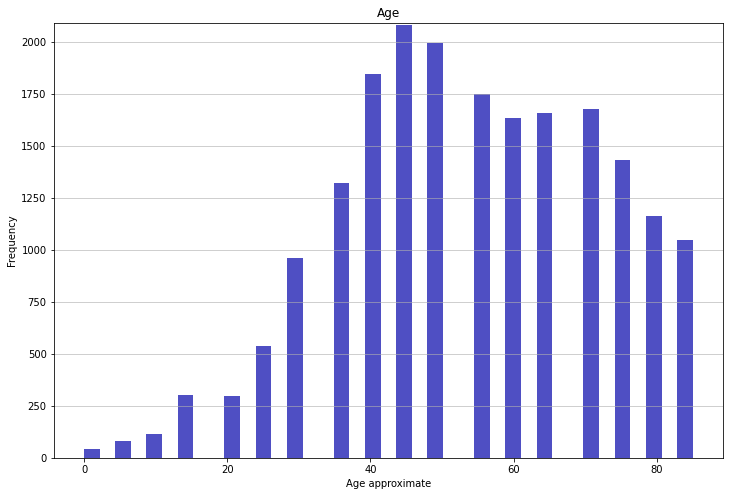

In [31]:
# Histogram for age
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=train_only["age_approx"], bins='auto', color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age approximate')
plt.ylabel('Frequency')
plt.title('Age')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

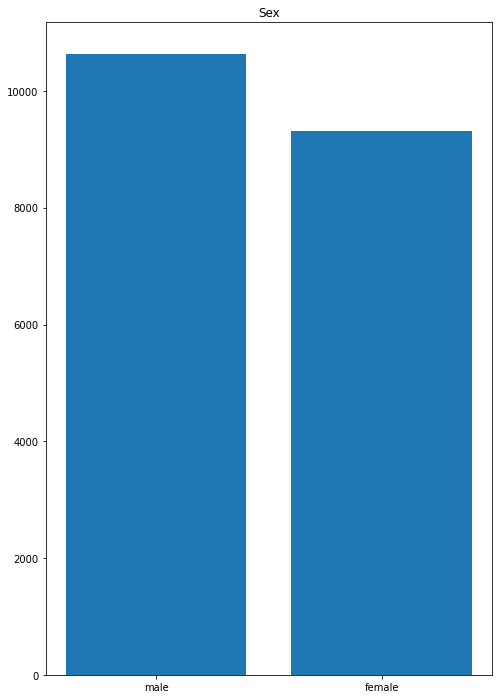

In [32]:
# Histogram for gender
sex_df = train_only.sex.value_counts()
# sex_df.index

fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(1,1,1)
ax.bar(sex_df.index, sex_df.values)
ax.set_title('Sex')
plt.show()

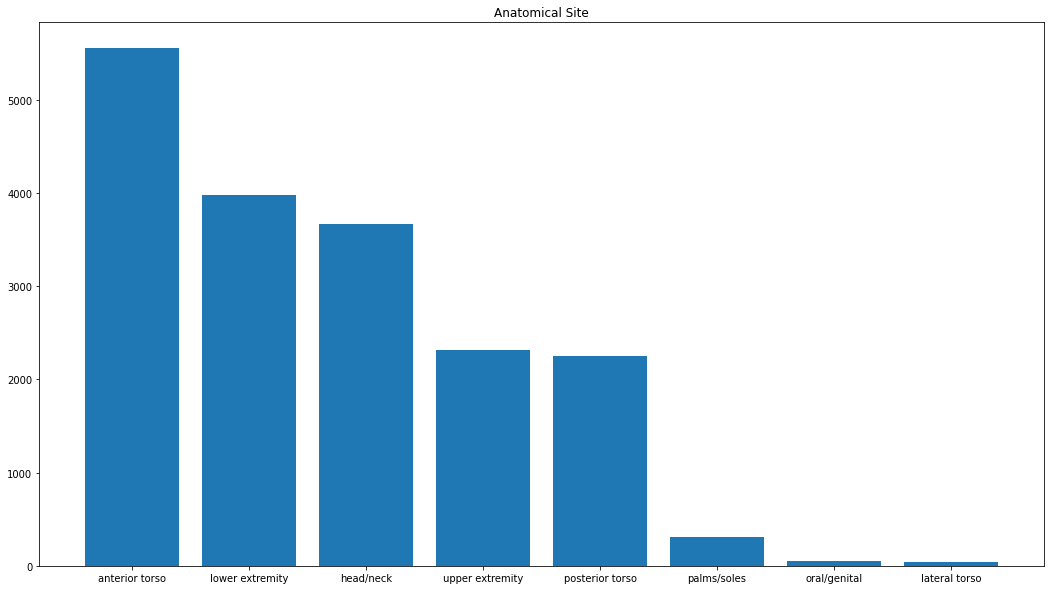

In [33]:
site_df = train_only.anatom_site_general.value_counts()

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1,1,1)
ax.bar(site_df.index, site_df.values)
ax.set_title('Anatomical Site')
plt.show()

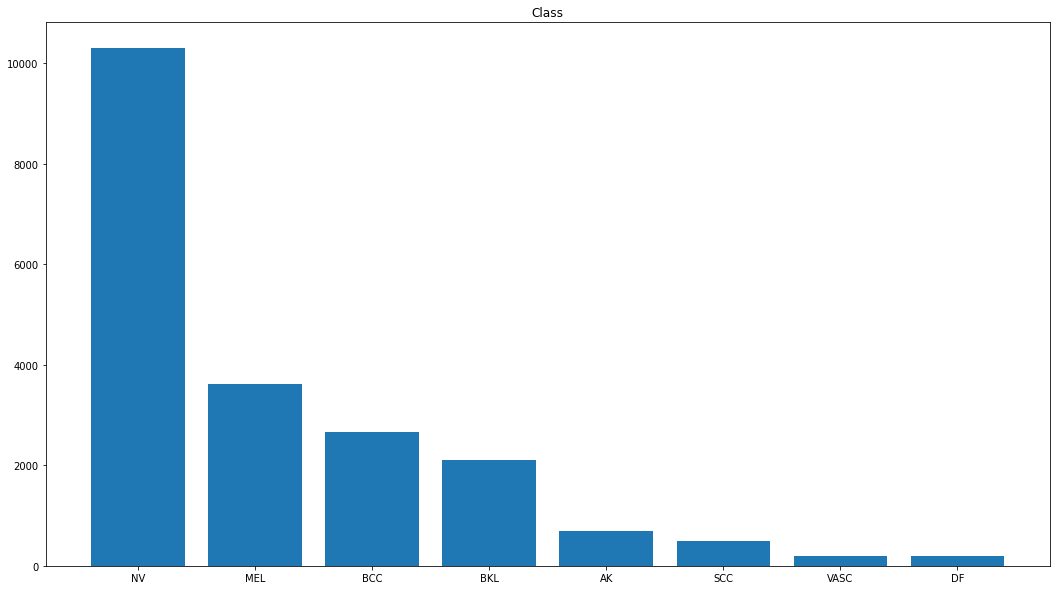

In [38]:
class_df = train_only["class"].value_counts()

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1,1,1)
ax.bar(class_df.index, class_df.values)
ax.set_title('Class')
plt.show()

(0.0, 840.0)

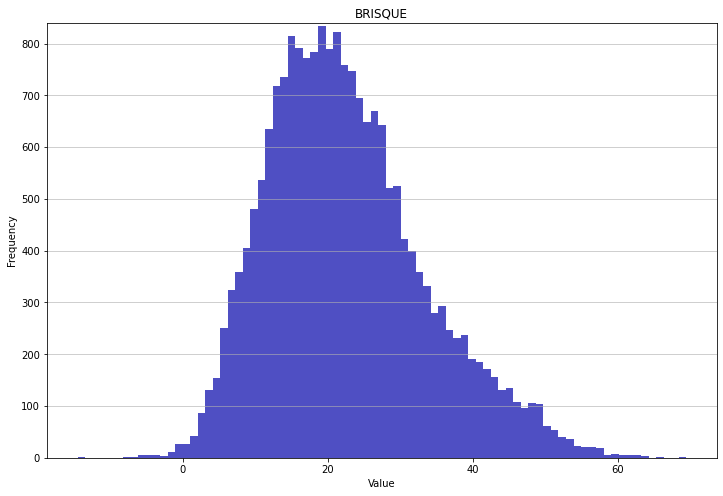

In [49]:
# for brisque

# Histogram for BRISQUE 
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=train_only["brisque"], bins='auto', color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('BRISQUE')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

 ## Test set EDA

(0.0, 260.0)

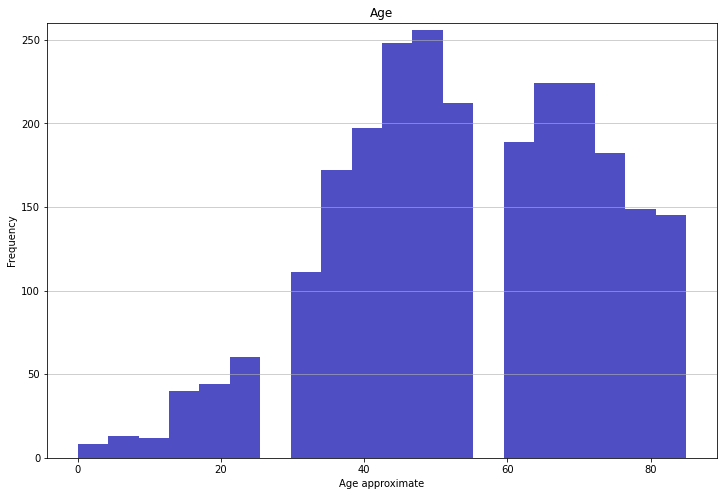

In [39]:
# Histogram for age
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=test_only["age_approx"], bins='auto', color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age approximate')
plt.ylabel('Frequency')
plt.title('Age')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

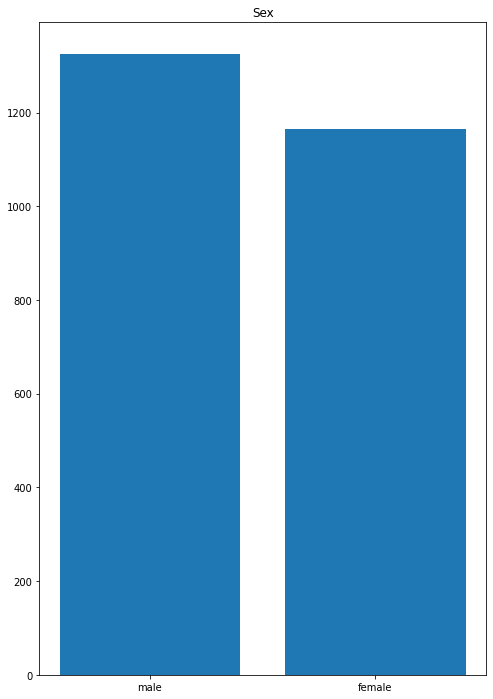

In [40]:
# Histogram for gender
sex_df = test_only.sex.value_counts()
# sex_df.index

fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(1,1,1)
ax.bar(sex_df.index, sex_df.values)
ax.set_title('Sex')
plt.show()

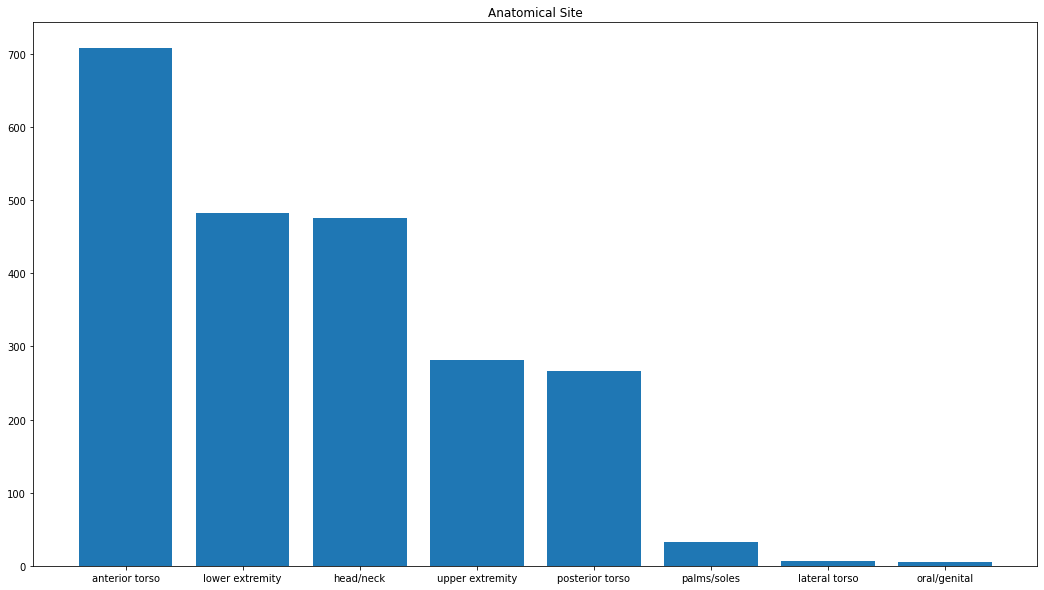

In [41]:
site_df = test_only.anatom_site_general.value_counts()

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1,1,1)
ax.bar(site_df.index, site_df.values)
ax.set_title('Anatomical Site')
plt.show()

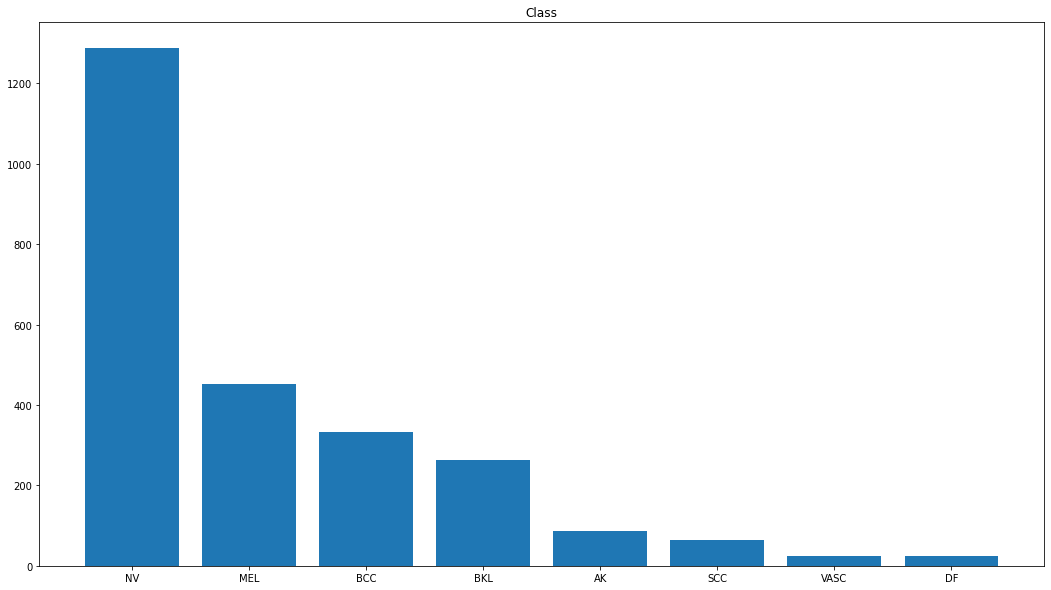

In [43]:
class_df = test_only["class"].value_counts()

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1,1,1)
ax.bar(class_df.index, class_df.values)
ax.set_title('Class')
plt.show()

(0.0, 220.0)

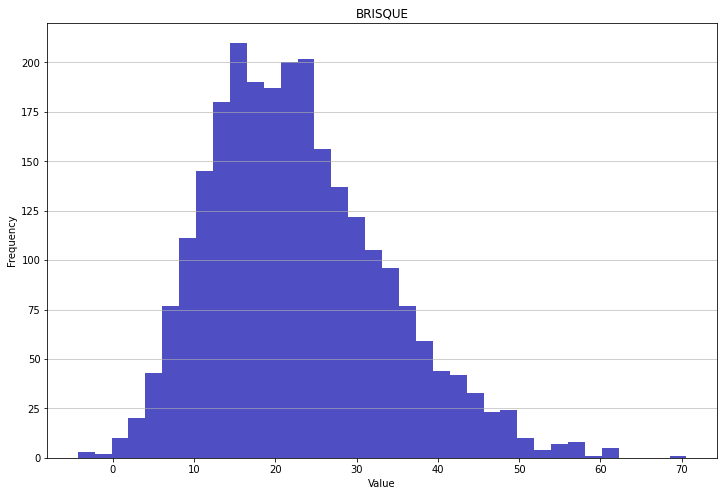

In [50]:
# for brisque

# Histogram for BRISQUE 
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=test_only["brisque"], bins='auto', color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('BRISQUE')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

## VAL set EDA

(0.0, 260.0)

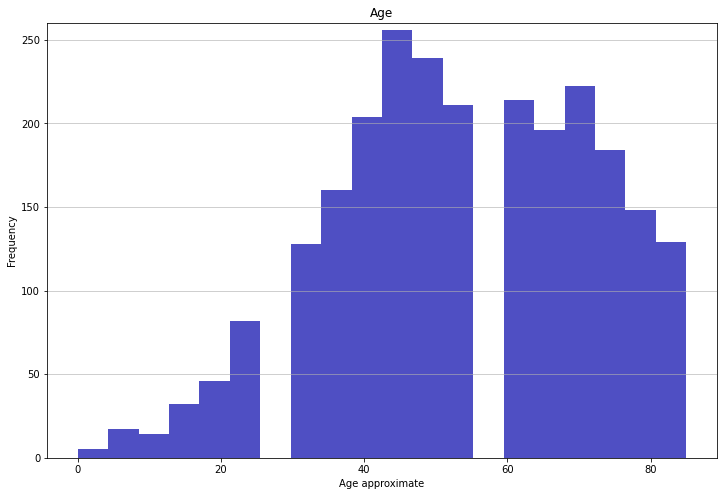

In [44]:
# Histogram for age
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=val_only["age_approx"], bins='auto', color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age approximate')
plt.ylabel('Frequency')
plt.title('Age')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

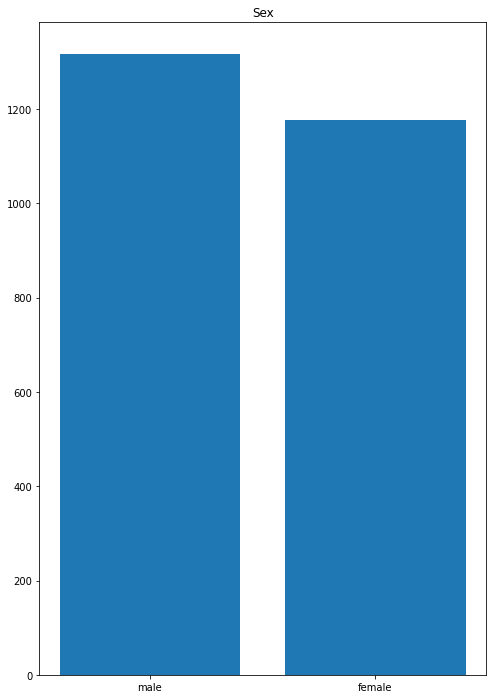

In [45]:
# Histogram for gender
sex_df = val_only.sex.value_counts()
# sex_df.index

fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(1,1,1)
ax.bar(sex_df.index, sex_df.values)
ax.set_title('Sex')
plt.show()

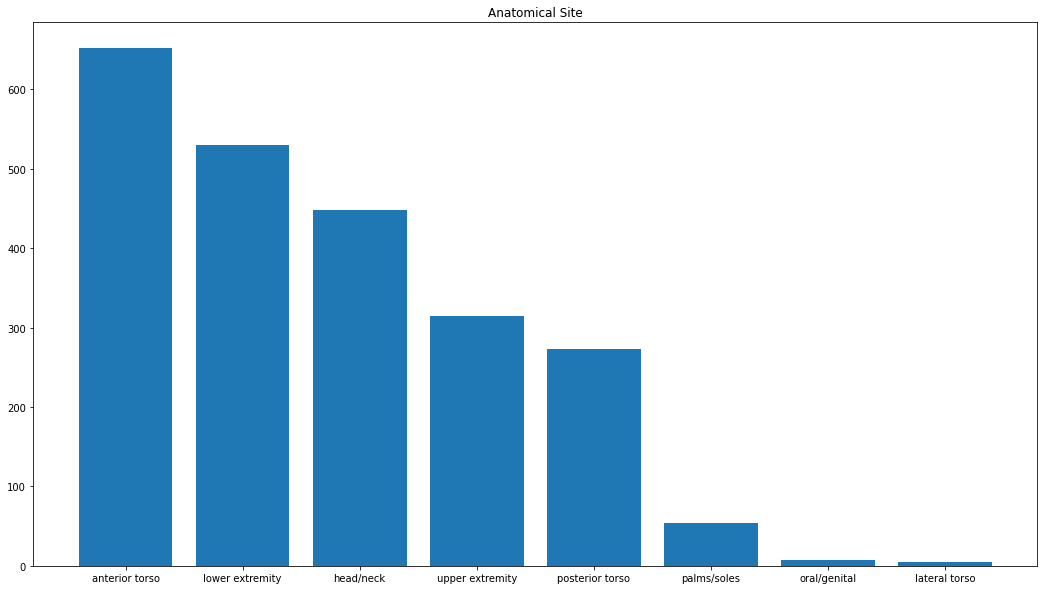

In [46]:
site_df = val_only.anatom_site_general.value_counts()

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1,1,1)
ax.bar(site_df.index, site_df.values)
ax.set_title('Anatomical Site')
plt.show()

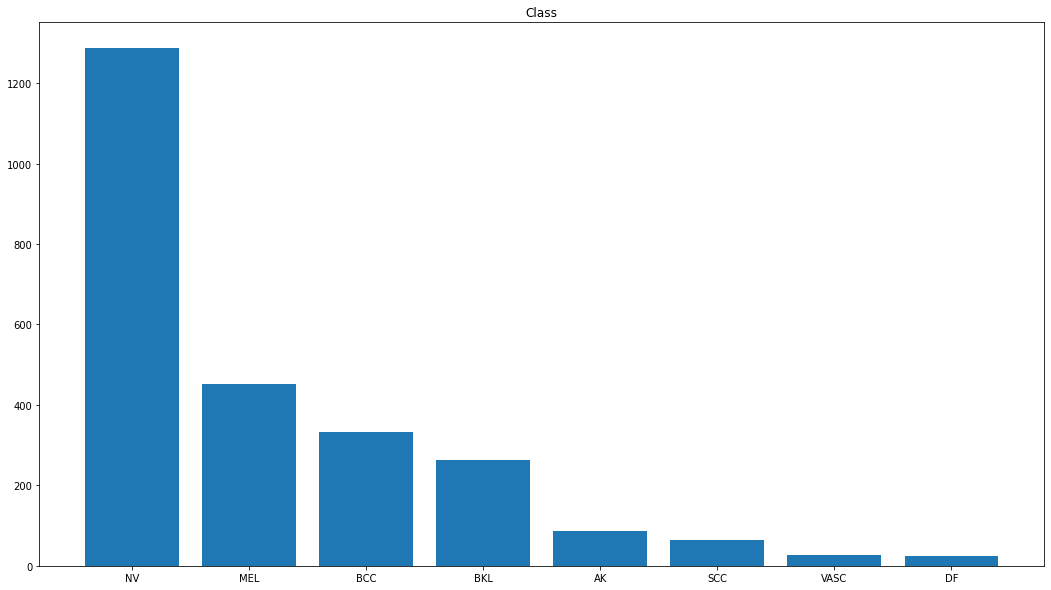

In [47]:
class_df = val_only["class"].value_counts()

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1,1,1)
ax.bar(class_df.index, class_df.values)
ax.set_title('Class')
plt.show()

(0.0, 220.0)

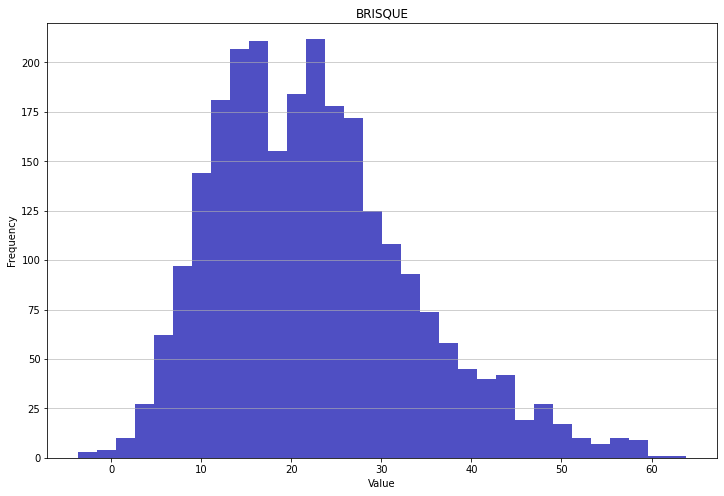

In [51]:
# for brisque

# Histogram for BRISQUE 
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=val_only["brisque"], bins='auto', color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('BRISQUE')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)